# 필요한 라이브러리 불러오기 

In [2]:
import warnings

# 경고 메시지 무시 설정
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

# 재무데이터

In [6]:
fin_df=pd.read_csv("C:\\Users\\seses\\Downloads\\재무데이터_오타수정_1021 (2).csv")

In [7]:
# 열 개수 세기 
# 중복 제거
fin_df_unique = fin_df.drop_duplicates()

# 열에 있는 데이터 개수 세기
column_counts = fin_df_unique['사업자번호'].value_counts()

In [8]:
column_counts

2208785337    14
2208787543    13
1118801122    12
2378701015    10
1108134126    10
              ..
5058503815     1
5058504264     1
5058504546     1
5058505680     1
2268531271     1
Name: 사업자번호, Length: 35709, dtype: int64

In [9]:
# 결산년월 2021년 데이터 개수 세기 

fin_df['결산년월'] = fin_df['결산년월'].astype(str)
target_string = '2021'
df_target_rows = fin_df[fin_df['결산년월'].str.contains(target_string)]

# 저장된 데이터 확인
print(df_target_rows)

             사업자번호      결산년월       유동자산       매출채권        비유동자산         유형자산  \
3       1018100340  20211231  1175030.0   273522.0   37135811.0     993025.0   
7       1018100772  20211231   549804.0        NaN   21237198.0   21231948.0   
11      1018101126  20211231  1798623.0   115892.0   35555977.0   34136073.0   
15      1018101242  20211231   543038.0   114573.0   24420419.0   21795940.0   
19      1018103819  20211231  1608654.0    18608.0   11514039.0   11063056.0   
...            ...       ...        ...        ...          ...          ...   
109120  8988800759  20211231  5333334.0  2467406.0    5435181.0    5265077.0   
109124  8998600665  20211231  1014176.0   235668.0   30896617.0   30743840.0   
109133  8998800150  20211231  6714661.0  1150864.0   20306701.0   16174996.0   
109137  8998800427  20211231  9192992.0  2918329.0    9735232.0    9409374.0   
109141  8998800785  20211231  2540577.0  1201346.0  422469161.0  420110684.0   

               자산총계         유동부채       

In [10]:
#결산년월 기준 가장 최신 값을 변수로 
fin_df_newest = fin_df.sort_values(by='결산년월', ascending=False).groupby('사업자번호', sort=False).head(1)

In [11]:
fin_df_newest

,사업자번호,결산년월,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,...,비유동부채비율(%),부채총계대 매출액(%),총자본회전율(%),재고자산회전율(%),매출채권회전율(%),매입채무회전율(%),미수금,매출원가,무형자산,재고자산
70365,3998701201,20220630,4116258.0,49584.0,73281532.0,72727878.0,77397791.0,256798.0,50259330.0,50516128.0,...,1.869650e+02,2934.147,0.022,1.000000e+12,5.805300e+01,1.000000e+12,113.0,525592.0,NaN,NaN
4021,1068108497,20220630,2398951.0,14189.0,29862247.0,29723067.0,32261197.0,14800152.0,2876085.0,17676238.0,...,1.972000e+01,602.425,0.092,1.000000e+12,1.101170e+02,1.000000e+12,NaN,NaN,NaN,NaN
105684,7668701226,20220630,1206284.0,NaN,33267520.0,33267520.0,34473804.0,22235157.0,8000.0,22243157.0,...,1.000000e+12,1647.766,0.039,1.000000e+12,1.000000e+12,1.000000e+12,93.0,NaN,NaN,NaN
16364,1208797528,20220630,7674040.0,NaN,227500721.0,227457366.0,235174761.0,1833222.0,132615341.0,134448563.0,...,1.316590e+02,1614.637,0.035,1.000000e+12,1.000000e+12,1.000000e+12,NaN,NaN,NaN,NaN
85193,5198101477,20220630,16738082.0,162289.0,503523057.0,503523057.0,520261139.0,3085279.0,311822981.0,314908260.0,...,1.518470e+02,2029.959,0.030,1.000000e+12,8.578900e+01,1.000000e+12,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96622,6138503232,20180331,8420115.0,4594414.0,2843741.0,2595134.0,11263855.0,3346833.0,50000.0,3396833.0,...,6.360000e-01,30.000,0.996,5.720000e+00,2.429000e+00,1.036500e+01,125461.0,10338303.0,NaN,1773309.0
56480,2208864019,20180331,509555.0,63969.0,46458990.0,45261425.0,46968545.0,27750710.0,1432216.0,29182926.0,...,1.000000e+12,3399.296,0.018,1.000000e+12,5.097000e+00,1.000000e+12,NaN,NaN,NaN,NaN
13437,1198187988,20180331,33210936.0,3147154.0,679000.0,NaN,33889936.0,2132432.0,NaN,2132432.0,...,1.000000e+12,11.912,0.368,6.951000e+00,2.216000e+00,3.861000e+00,418572.0,16071569.0,NaN,NaN
56147,2208819682,20180331,108220189.0,NaN,NaN,NaN,108220189.0,158577.0,NaN,158577.0,...,1.000000e+12,7.424,0.018,1.000000e+12,9.110000e-01,1.000000e+12,NaN,NaN,NaN,NaN


### 최신데이터 2021은 나중에 데이터를 붙인 다음에 보기로 함

# 결측치 처리

In [12]:
# 결측치가 있는 행 개수 세기
df_missing_rows = fin_df_newest.dropna()

# 저장된 데이터 확인
print(df_missing_rows)


             사업자번호      결산년월        유동자산        매출채권       비유동자산        유형자산  \
51280   2148753150  20220630  30556287.0  21480269.0  38336328.0  33809277.0   
22141   1258155540  20220630  28670469.0  11243001.0   8251451.0   6746169.0   
81508   5068106724  20220630  26096967.0   7198810.0  23187203.0  20626501.0   
43528   2018177964  20220630  41058200.0   6777718.0  34315807.0  23756264.0   
54868   2208172086  20220630   8565809.0   2470187.0  13899537.0  13278770.0   
...            ...       ...         ...         ...         ...         ...   
108153  8608500087  20180331   6879675.0   3964659.0  17076199.0  10837147.0   
41383   1438127076  20180331   8125129.0    894926.0   3329648.0   3201891.0   
66211   3128638005  20180331  11575731.0   4757856.0   1040836.0     37361.0   
87886   6028522170  20180331   2196004.0    990945.0    174426.0     90816.0   
93225   6088511628  20180331   2196004.0    990945.0    174426.0     90816.0   

              자산총계        유동부채       비유

In [13]:
#행별 결측치 개수 따로 저장 

In [14]:
fin_df_newest['결측치개수'] = fin_df_newest.isna().sum(axis=1)

In [15]:
fin_df_newest['결측치개수'].describe()

count    35709.000000
mean         2.200958
std          2.843328
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         41.000000
Name: 결측치개수, dtype: float64

In [16]:
len(df_missing_rows)

7893

In [17]:
len(fin_df_newest)

35709

In [18]:
fin_df_newest = fin_df_newest.fillna(0)

#### 결측치를 0으로 채운 이유 
- 비정형 데이터를 활용한 머신러닝기반 기업신용평가모형에 관한 연구 참고

In [19]:
fin_df_newest

,사업자번호,결산년월,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,...,부채총계대 매출액(%),총자본회전율(%),재고자산회전율(%),매출채권회전율(%),매입채무회전율(%),미수금,매출원가,무형자산,재고자산,결측치개수
70365,3998701201,20220630,4116258.0,49584.0,73281532.0,72727878.0,77397791.0,256798.0,50259330.0,50516128.0,...,2934.147,0.022,1.000000e+12,5.805300e+01,1.000000e+12,113.0,525592.0,0.0,0.0,3
4021,1068108497,20220630,2398951.0,14189.0,29862247.0,29723067.0,32261197.0,14800152.0,2876085.0,17676238.0,...,602.425,0.092,1.000000e+12,1.101170e+02,1.000000e+12,0.0,0.0,0.0,0.0,4
105684,7668701226,20220630,1206284.0,0.0,33267520.0,33267520.0,34473804.0,22235157.0,8000.0,22243157.0,...,1647.766,0.039,1.000000e+12,1.000000e+12,1.000000e+12,93.0,0.0,0.0,0.0,5
16364,1208797528,20220630,7674040.0,0.0,227500721.0,227457366.0,235174761.0,1833222.0,132615341.0,134448563.0,...,1614.637,0.035,1.000000e+12,1.000000e+12,1.000000e+12,0.0,0.0,0.0,0.0,6
85193,5198101477,20220630,16738082.0,162289.0,503523057.0,503523057.0,520261139.0,3085279.0,311822981.0,314908260.0,...,2029.959,0.030,1.000000e+12,8.578900e+01,1.000000e+12,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96622,6138503232,20180331,8420115.0,4594414.0,2843741.0,2595134.0,11263855.0,3346833.0,50000.0,3396833.0,...,30.000,0.996,5.720000e+00,2.429000e+00,1.036500e+01,125461.0,10338303.0,0.0,1773309.0,1
56480,2208864019,20180331,509555.0,63969.0,46458990.0,45261425.0,46968545.0,27750710.0,1432216.0,29182926.0,...,3399.296,0.018,1.000000e+12,5.097000e+00,1.000000e+12,0.0,0.0,0.0,0.0,5
13437,1198187988,20180331,33210936.0,3147154.0,679000.0,0.0,33889936.0,2132432.0,0.0,2132432.0,...,11.912,0.368,6.951000e+00,2.216000e+00,3.861000e+00,418572.0,16071569.0,0.0,0.0,4
56147,2208819682,20180331,108220189.0,0.0,0.0,0.0,108220189.0,158577.0,0.0,158577.0,...,7.424,0.018,1.000000e+12,9.110000e-01,1.000000e+12,0.0,0.0,0.0,0.0,9


In [20]:
# 열 이름 다시 정의
new_column_names = {'결측치개수': '재무결측치개수'}
fin_df_newest = fin_df_newest.rename(columns=new_column_names)

In [21]:
fin_df_newest.columns

Index(['사업자번호', '결산년월', '유동자산', '매출채권', '비유동자산', '유형자산', '자산총계', '유동부채',
       '비유동부채', '부채총계', '자본금', '이익잉여금(결손금）', '자본총계', '매출액', '판매비와관리비',
       '영업이익(손실)', '법인세비용차감전순손익', '법인세비용', '당기순이익(손실)', '기업순이익률(%)',
       '유보액/총자산(%)', '유보액/납입자본(%)', '매출액총이익률(%)', '매출액영업이익률(%)', '매출액순이익률(%)',
       '수지비율(%)', '경상수지비율(%)', '영업비율(%)', '금융비용대매출액비율(%)', '금융비용대부채비율(%)',
       '금융비용대총비용비율(%)', '부채비율(%)', '차입금의존도(%)', '자기자본비율(%)', '순운전자본비율(%)',
       '유동부채비율(%)', '비유동부채비율(%)', '부채총계대 매출액(%)', '총자본회전율(%)', '재고자산회전율(%)',
       '매출채권회전율(%)', '매입채무회전율(%)', '미수금', '매출원가', '무형자산', '재고자산', '재무결측치개수'],
      dtype='object')

In [22]:
# 열 이름 다시 정의
new_column_names = {'사업자번호': 'BIZ_NO'}
fin_df_newest = fin_df_newest.rename(columns=new_column_names)

In [23]:
fin_df_newest

,BIZ_NO,결산년월,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,...,부채총계대 매출액(%),총자본회전율(%),재고자산회전율(%),매출채권회전율(%),매입채무회전율(%),미수금,매출원가,무형자산,재고자산,재무결측치개수
70365,3998701201,20220630,4116258.0,49584.0,73281532.0,72727878.0,77397791.0,256798.0,50259330.0,50516128.0,...,2934.147,0.022,1.000000e+12,5.805300e+01,1.000000e+12,113.0,525592.0,0.0,0.0,3
4021,1068108497,20220630,2398951.0,14189.0,29862247.0,29723067.0,32261197.0,14800152.0,2876085.0,17676238.0,...,602.425,0.092,1.000000e+12,1.101170e+02,1.000000e+12,0.0,0.0,0.0,0.0,4
105684,7668701226,20220630,1206284.0,0.0,33267520.0,33267520.0,34473804.0,22235157.0,8000.0,22243157.0,...,1647.766,0.039,1.000000e+12,1.000000e+12,1.000000e+12,93.0,0.0,0.0,0.0,5
16364,1208797528,20220630,7674040.0,0.0,227500721.0,227457366.0,235174761.0,1833222.0,132615341.0,134448563.0,...,1614.637,0.035,1.000000e+12,1.000000e+12,1.000000e+12,0.0,0.0,0.0,0.0,6
85193,5198101477,20220630,16738082.0,162289.0,503523057.0,503523057.0,520261139.0,3085279.0,311822981.0,314908260.0,...,2029.959,0.030,1.000000e+12,8.578900e+01,1.000000e+12,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96622,6138503232,20180331,8420115.0,4594414.0,2843741.0,2595134.0,11263855.0,3346833.0,50000.0,3396833.0,...,30.000,0.996,5.720000e+00,2.429000e+00,1.036500e+01,125461.0,10338303.0,0.0,1773309.0,1
56480,2208864019,20180331,509555.0,63969.0,46458990.0,45261425.0,46968545.0,27750710.0,1432216.0,29182926.0,...,3399.296,0.018,1.000000e+12,5.097000e+00,1.000000e+12,0.0,0.0,0.0,0.0,5
13437,1198187988,20180331,33210936.0,3147154.0,679000.0,0.0,33889936.0,2132432.0,0.0,2132432.0,...,11.912,0.368,6.951000e+00,2.216000e+00,3.861000e+00,418572.0,16071569.0,0.0,0.0,4
56147,2208819682,20180331,108220189.0,0.0,0.0,0.0,108220189.0,158577.0,0.0,158577.0,...,7.424,0.018,1.000000e+12,9.110000e-01,1.000000e+12,0.0,0.0,0.0,0.0,9


# 데이터 합치기

In [24]:
close_df=pd.read_csv("C:\\Users\\seses\\Documents\\카카오톡 받은 파일\\휴폐업 재무 eda (2) (1).csv")

In [25]:
close_df

,BIZ_NO,HDOF_BR_GB,FR_IVST_CORP_YN,VENT_YN,MDSCO_PRTC_YN,ESTB_GB,EMP_CNT,Industry,Stock_OX,New,Target
0,1268145633,1,N,N,N,1,40.000000,C,(주),1,1
1,1388101749,1,N,N,N,1,13.000000,G,(주),1,1
2,1068179240,1,N,N,N,1,1.000000,G,(주),1,1
3,2248114507,1,N,N,N,1,6.000000,C,(주),1,1
4,1168132785,1,N,N,N,1,40.000000,C,(주),1,1
...,...,...,...,...,...,...,...,...,...,...,...
6792,4808501629,2,N,N,N,1,24.243775,C,미분류,2,1
6793,8018501578,2,N,N,N,1,22.000000,C,(주),2,1
6794,4118523419,2,N,N,N,1,0.000000,I,(주),2,1
6795,1738102533,1,N,N,N,1,20.241758,J,(주),2,1


In [26]:
# 특정 열 기준으로 데이터프레임 합치기
merged_df_close = pd.merge(fin_df_newest, close_df, on='BIZ_NO')

In [27]:
merged_df_close

,BIZ_NO,결산년월,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,...,HDOF_BR_GB,FR_IVST_CORP_YN,VENT_YN,MDSCO_PRTC_YN,ESTB_GB,EMP_CNT,Industry,Stock_OX,New,Target
0,6998800583,20220331,24965602.0,0.0,219000.0,0.0,25184602.0,1999913.0,0.0,1999913.0,...,1,N,N,N,1,2.000000,K,(주),2,1
1,5168100635,20211231,615988.0,185615.0,42385.0,14120.0,658373.0,494966.0,103545.0,598511.0,...,1,N,Y,N,1,10.000000,J,(주),2,1
2,1348715772,20211231,1596577.0,3802.0,353082.0,39340.0,1949659.0,771535.0,194663.0,966198.0,...,1,N,Y,N,1,14.000000,J,(주),1,1
3,5158115284,20211231,30077990.0,6034264.0,15251977.0,7279856.0,45329967.0,15391552.0,5304808.0,20696360.0,...,1,N,Y,N,1,173.000000,C,(주),1,1
4,1348631964,20211231,28431311.0,15498763.0,21334735.0,19795298.0,49766046.0,28142492.0,638761.0,28781253.0,...,1,N,Y,N,1,113.000000,C,(주),1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6784,6138503232,20180331,8420115.0,4594414.0,2843741.0,2595134.0,11263855.0,3346833.0,50000.0,3396833.0,...,2,N,N,N,5,14.095397,G,미분류,0,1
6785,2208864019,20180331,509555.0,63969.0,46458990.0,45261425.0,46968545.0,27750710.0,1432216.0,29182926.0,...,1,N,N,N,1,10.000000,L,(주),2,1
6786,1198187988,20180331,33210936.0,3147154.0,679000.0,0.0,33889936.0,2132432.0,0.0,2132432.0,...,1,N,N,N,1,3.000000,G,(주),1,1
6787,2208819682,20180331,108220189.0,0.0,0.0,0.0,108220189.0,158577.0,0.0,158577.0,...,1,Y,N,N,1,4.000000,L,(주),1,1


In [28]:
len(merged_df_close)

6789

In [29]:
# 결산년월 2021년 데이터 개수 세기 

merged_df_close['결산년월'] = merged_df_close['결산년월'].astype(str)
target_string = '2021'
df_target_rows = merged_df_close[merged_df_close['결산년월'].str.contains(target_string)]

# 저장된 데이터 확인
print(df_target_rows)

         BIZ_NO      결산년월        유동자산        매출채권       비유동자산        유형자산  \
1    5168100635  20211231    615988.0    185615.0     42385.0     14120.0   
2    1348715772  20211231   1596577.0      3802.0    353082.0     39340.0   
3    5158115284  20211231  30077990.0   6034264.0  15251977.0   7279856.0   
4    1348631964  20211231  28431311.0  15498763.0  21334735.0  19795298.0   
5    5818700266  20211231   9903117.0    163524.0    987116.0    302050.0   
..          ...       ...         ...         ...         ...         ...   
130  4918801111  20210331   1103327.0         0.0     65877.0     11157.0   
131  1198801000  20210331   2739685.0   1172250.0    117034.0         0.0   
132  8228700018  20210228    996309.0         0.0  20445054.0  20445054.0   
133  1708701390  20210131         0.0         0.0         0.0         0.0   
134  5468601270  20210131   7834111.0         0.0         0.0         0.0   

           자산총계        유동부채      비유동부채        부채총계  ...  HDOF_BR_GB  \
1   

In [30]:
active_df = pd.read_csv("C:\\Users\\seses\\Documents\\카카오톡 받은 파일\\액티브 외감 eda(2).csv",encoding='cp949')

In [31]:
active_df

,Unnamed: 0,Unnamed: 0.1,BIZ_NO,HDOF_BR_GB,FR_IVST_CORP_YN,VENT_YN,MDSCO_PRTC_YN,ESTB_GB,EMP_CNT,Industry,Stock_OX,target,New
0,0,0,1138111739,1,N,N,N,1,43.0,G,(주),0,1
1,1,1,2078132193,1,N,N,N,1,35.0,C,(주),0,1
2,2,2,1318167565,1,N,N,N,1,149.0,H,(주),0,1
3,3,3,5048128251,1,N,N,N,1,75.0,C,(주),0,1
4,4,4,1098164260,1,N,N,N,1,3.0,G,(주),0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28977,28977,28977,8048101453,1,N,N,N,1,0.0,NaN,미분류,0,2
28978,28978,28978,8028701430,1,N,N,N,1,1.0,L,(주),0,2
28979,28979,28979,4268501421,2,N,N,N,1,81.0,M,미분류,0,1
28980,28980,28980,6518502462,2,N,N,N,1,26.0,C,(주),0,2


In [33]:
active_df = active_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [35]:
# 열 이름 다시 정의
new_column_names = {'target': 'Target'}
active_df = active_df.rename(columns=new_column_names)

In [37]:
# 특정 열 기준으로 데이터프레임 합치기
merged_df_active = pd.merge(fin_df_newest, active_df, on='BIZ_NO')

In [38]:
len(merged_df_close)

6789

In [39]:
len(merged_df_active)

28978

In [42]:
len(merged_df_close)/len(merged_df_active)

0.23428117882531577

In [121]:
# 결산년월 2021년 데이터 개수 세기 

merged_df_active['결산년월'] = merged_df_active['결산년월'].astype(str)
target_string = '2021'
df_target_rows = merged_df_active[merged_df_active['결산년월'].str.contains(target_string)]

# 저장된 데이터 확인
print(df_target_rows)

           BIZ_NO      결산년월        유동자산       매출채권       비유동자산        유형자산  \
384    5158141948  20211231  20493436.0  3016491.0  30183237.0  16696315.0   
385    5158153594  20211231  10146571.0  7055931.0   6521184.0   6261915.0   
386    5158153314  20211231  17701360.0  3065358.0   6759564.0   6606558.0   
387    5318600487  20211231   5377067.0  4688682.0   1106543.0    364116.0   
388    1348155883  20211231   7410978.0  3756147.0  16162123.0  16061178.0   
...           ...       ...         ...        ...         ...         ...   
25124  1168171681  20210331         0.0        0.0         0.0         0.0   
25125  1048164533  20210331         0.0        0.0         0.0         0.0   
25126  4908800782  20210228    585609.0        0.0   1237967.0    268213.0   
25127  2148866346  20210228  10596492.0    25540.0   4485061.0    431602.0   
25128  2648115858  20210131    654577.0   258243.0   7747798.0     53499.0   

             자산총계        유동부채       비유동부채        부채총계  ...  HDO

In [43]:
# 행 방향으로 데이터프레임 합치기
saved_df = pd.concat([merged_df_close, merged_df_active])

In [44]:
# 열 이름 다시 정의
new_column_names = {'New': '신생기업여부'}
saved_df = saved_df.rename(columns=new_column_names)

- '신생기업여부'에서 0은 Nan값, 오래된 기업은 1, 신생 기업은 2

In [46]:
# 데이터프레임을 CSV 파일로 저장
saved_df.to_csv('액티브+휴폐업+재무데이터.csv', index=False, encoding='utf-8-sig')

# 이상치 처리(98%값과 2%로 대체되는 열이 너무 많아 생략하기로 함)

In [69]:
fin_df_newest.columns

Index(['BIZ_NO', '결산년월', '유동자산', '매출채권', '비유동자산', '유형자산', '자산총계', '유동부채',
       '비유동부채', '부채총계', '자본금', '이익잉여금(결손금）', '자본총계', '매출액', '판매비와관리비',
       '영업이익(손실)', '법인세비용차감전순손익', '법인세비용', '당기순이익(손실)', '기업순이익률(%)',
       '유보액/총자산(%)', '유보액/납입자본(%)', '매출액총이익률(%)', '매출액영업이익률(%)', '매출액순이익률(%)',
       '수지비율(%)', '경상수지비율(%)', '영업비율(%)', '금융비용대매출액비율(%)', '금융비용대부채비율(%)',
       '금융비용대총비용비율(%)', '부채비율(%)', '차입금의존도(%)', '자기자본비율(%)', '순운전자본비율(%)',
       '유동부채비율(%)', '비유동부채비율(%)', '부채총계대 매출액(%)', '총자본회전율(%)', '재고자산회전율(%)',
       '매출채권회전율(%)', '매입채무회전율(%)', '미수금', '매출원가', '무형자산', '재고자산', '재무결측치개수'],
      dtype='object')

In [114]:
fin_df_newest.dtypes

BIZ_NO             int64
결산년월              object
유동자산             float64
매출채권             float64
비유동자산            float64
유형자산             float64
자산총계             float64
유동부채             float64
비유동부채            float64
부채총계             float64
자본금              float64
이익잉여금(결손금）       float64
자본총계             float64
매출액              float64
판매비와관리비          float64
영업이익(손실)         float64
법인세비용차감전순손익      float64
법인세비용            float64
당기순이익(손실)        float64
기업순이익률(%)        float64
유보액/총자산(%)       float64
유보액/납입자본(%)      float64
매출액총이익률(%)       float64
매출액영업이익률(%)      float64
매출액순이익률(%)       float64
수지비율(%)          float64
경상수지비율(%)        float64
영업비율(%)          float64
금융비용대매출액비율(%)    float64
금융비용대부채비율(%)     float64
금융비용대총비용비율(%)    float64
부채비율(%)          float64
차입금의존도(%)        float64
자기자본비율(%)        float64
순운전자본비율(%)       float64
유동부채비율(%)        float64
비유동부채비율(%)       float64
부채총계대 매출액(%)     float64
총자본회전율(%)        float64
재고자산회전율(%)       float64


BIZ_NO             int64
결산년월              object 

In [75]:
# 특정 열 삭제
drop_fin_df_newest = fin_df_newest.drop(['BIZ_NO', '결산년월'], axis=1)

In [77]:
len(outlier_columns)

41

In [78]:
len(fin_df_newest.columns)-2

45

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 46041 missing from cur

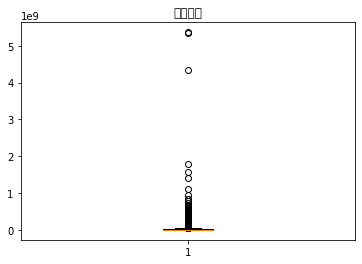

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 52636 missing from cur

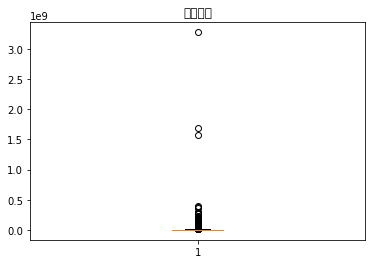

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48708 missing from c

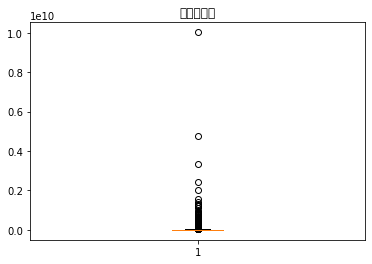

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 54805 missing from cur

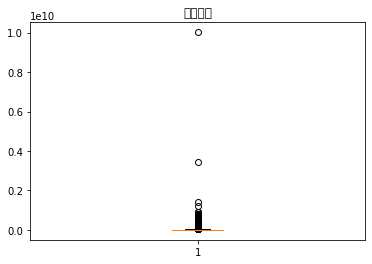

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49328 missing from cur

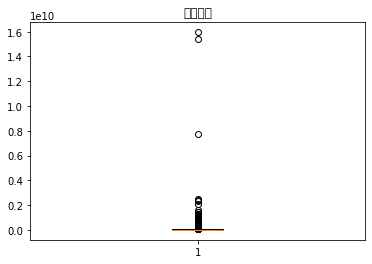

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 46041 missing from cur

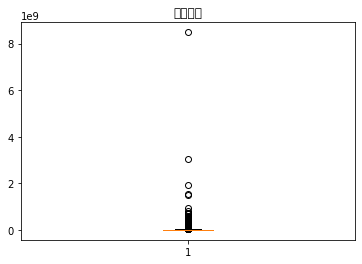

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48708 missing from c

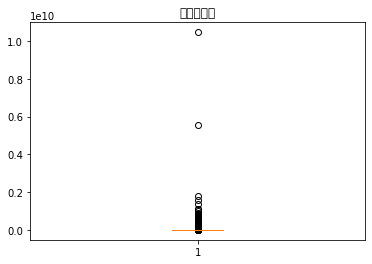

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 52292 missing from cur

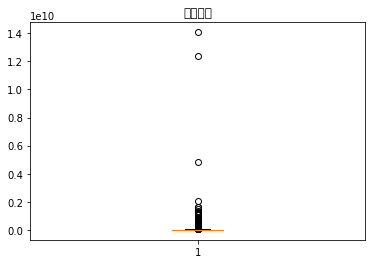

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44552 missing from curre

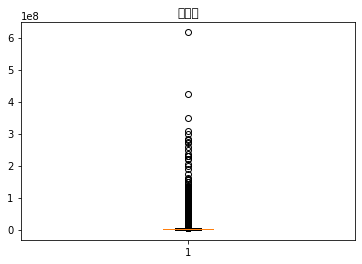

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51081 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44208 missing from c

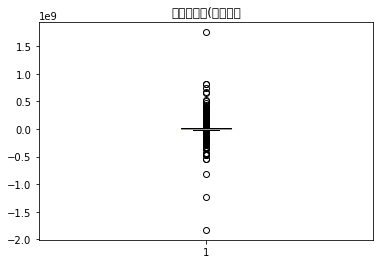

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48376 missing from cur

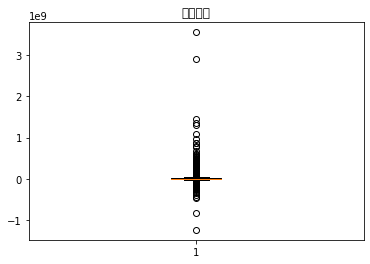

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50529 missing from curre

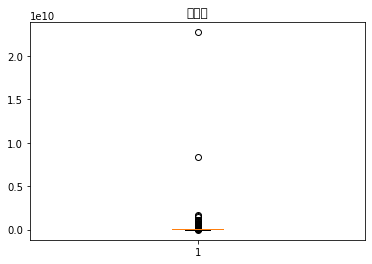

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47532 missing from c

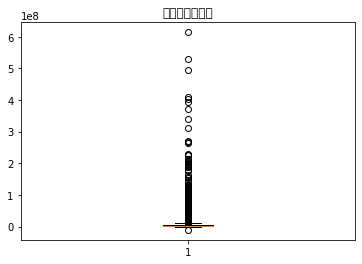

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49892 missing from c

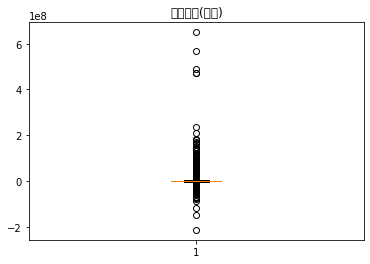

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52264 missing from c

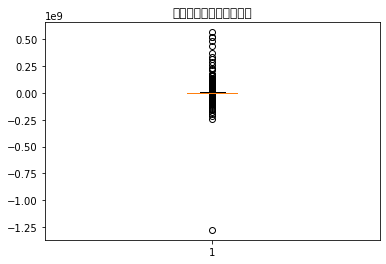

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48277 missing from c

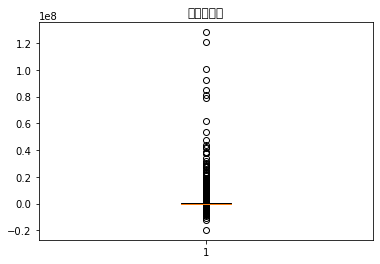

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49552 missing from c

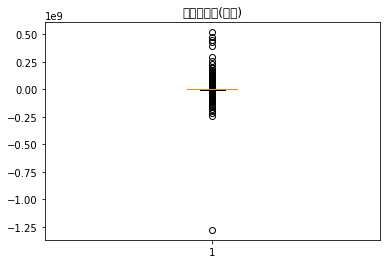

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47456 missing from c

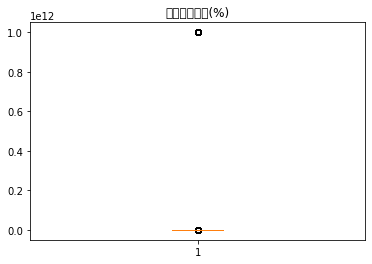

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49328 missing from c

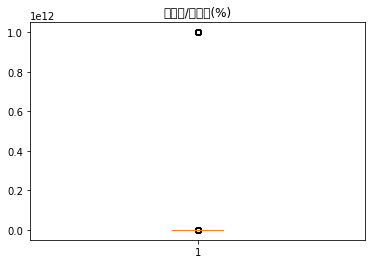

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from c

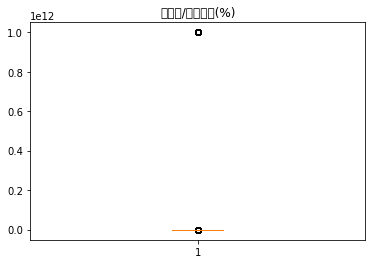

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51061 missing from c

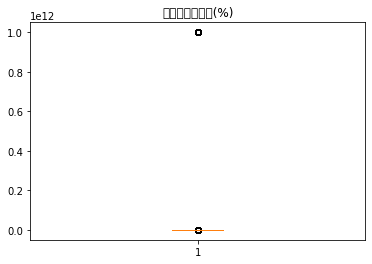

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from c

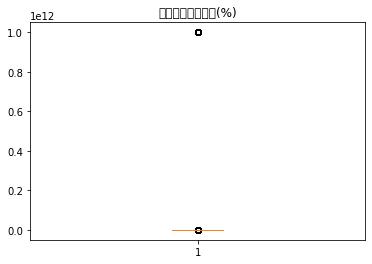

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51061 missing from c

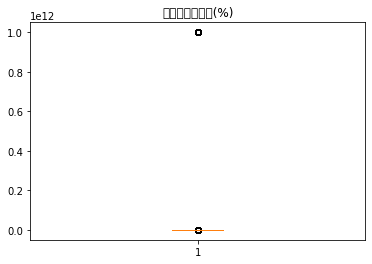

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51648 missing from cur

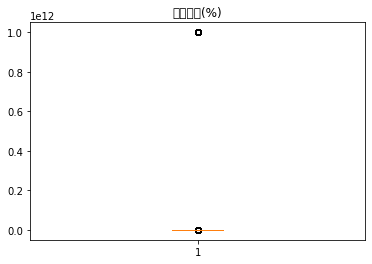

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50984 missing from c

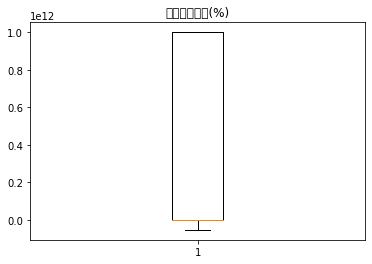

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50629 missing from cur

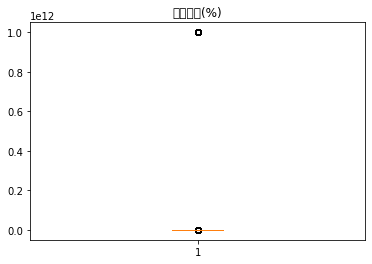

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50997 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from c

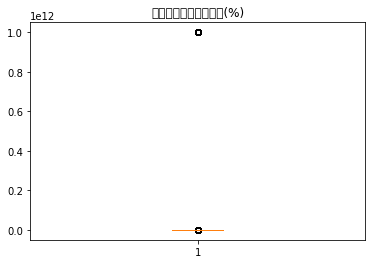

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50997 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48512 missing from c

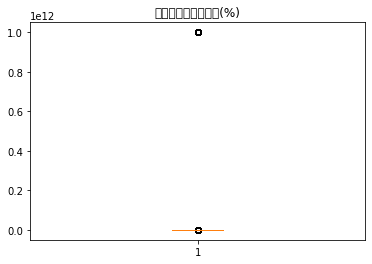

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50997 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52509 missing from c

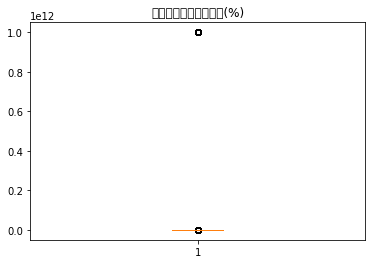

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 52292 missing from cur

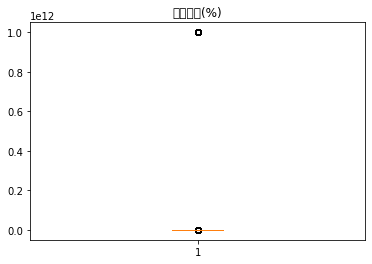

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from c

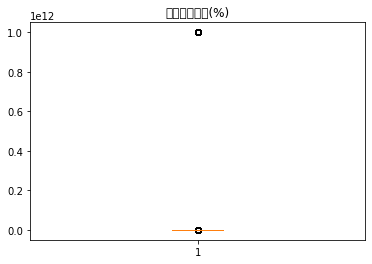

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51088 missing from c

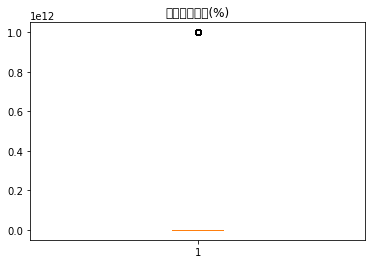

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48708 missing from c

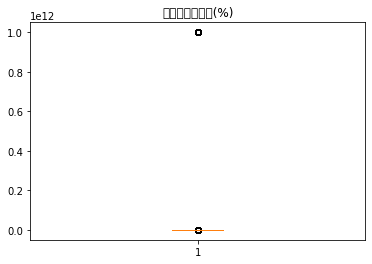

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50984 missing from c

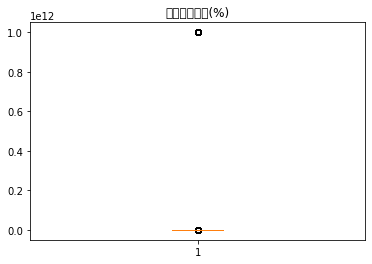

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50984 missing from c

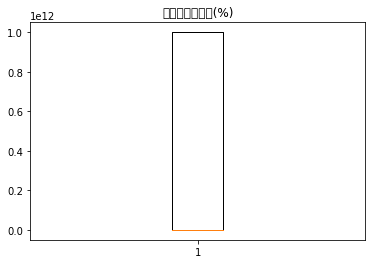

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from c

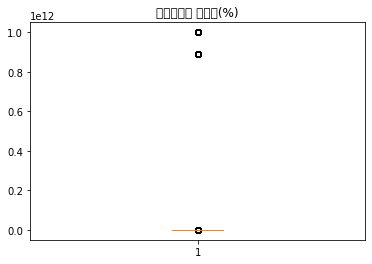

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50984 missing from c

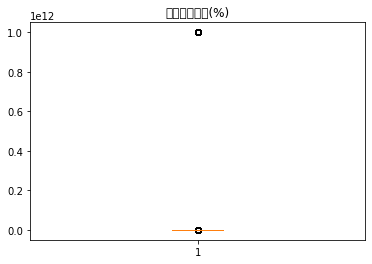

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from c

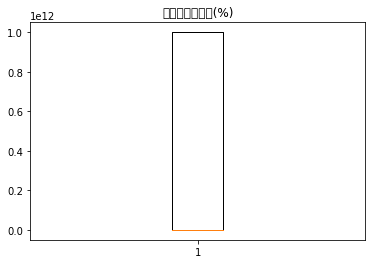

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from c

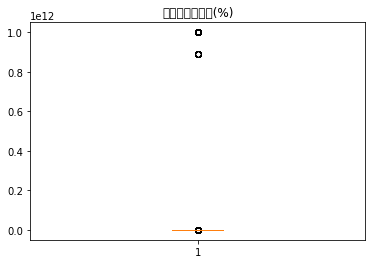

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from c

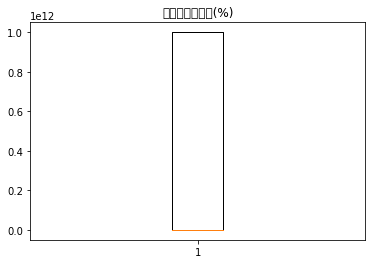

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44552 missing from curre

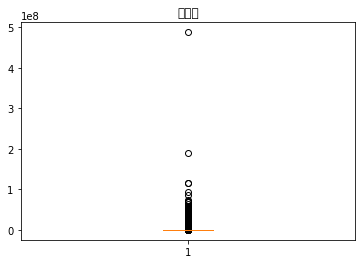

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 52636 missing from cur

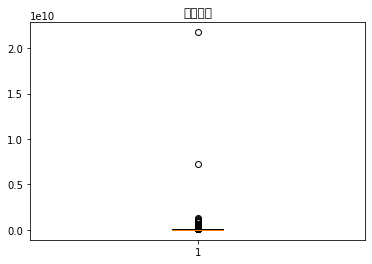

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 54805 missing from cur

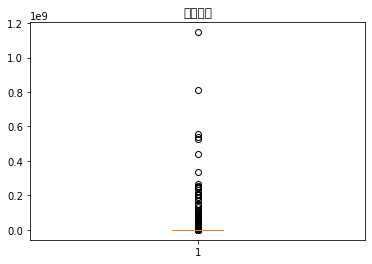

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44256 missing from cur

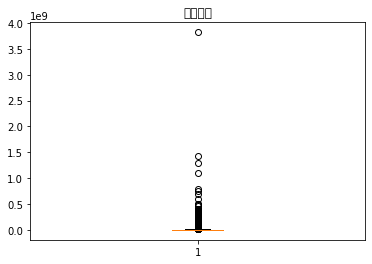

C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seses\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44060 missing from c

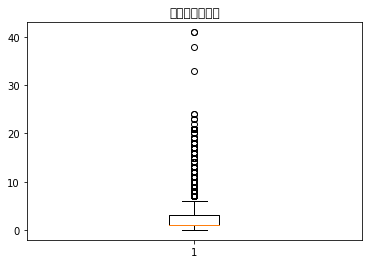

극단치가 있는 열: ['유동자산', '매출채권', '비유동자산', '유형자산', '자산총계', '유동부채', '비유동부채', '부채총계', '자본금', '이익잉여금(결손금）', '자본총계', '매출액', '판매비와관리비', '영업이익(손실)', '법인세비용차감전순손익', '법인세비용', '당기순이익(손실)', '기업순이익률(%)', '유보액/총자산(%)', '유보액/납입자본(%)', '매출액총이익률(%)', '매출액영업이익률(%)', '매출액순이익률(%)', '수지비율(%)', '영업비율(%)', '금융비용대매출액비율(%)', '금융비용대부채비율(%)', '금융비용대총비용비율(%)', '부채비율(%)', '차입금의존도(%)', '자기자본비율(%)', '순운전자본비율(%)', '유동부채비율(%)', '부채총계대 매출액(%)', '총자본회전율(%)', '매출채권회전율(%)', '미수금', '매출원가', '무형자산', '재고자산', '재무결측치개수']


In [76]:
# 극단치가 있는 열 확인
outlier_columns = []

# 열별로 박스 플롯 그리기
for column in drop_fin_df_newest.columns:
    plt.boxplot(drop_fin_df_newest[column])
    plt.title(column)
    plt.show()
    
    # 박스 플롯에서 극단치를 판별하여 리스트에 추가
    # 여기서는 예시로 박스 플롯의 극단치 기준으로 1.5 * IQR을 사용합니다.
    # IQR은 Interquartile Range(사분위 범위)로, Q3 - Q1 값을 의미합니다.
    Q1 = drop_fin_df_newest[column].quantile(0.25)
    Q3 = drop_fin_df_newest[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    
    outliers = drop_fin_df_newest[(drop_fin_df_newest[column] < lower_threshold) | (drop_fin_df_newest[column] > upper_threshold)]
    if not outliers.empty:
        outlier_columns.append(column)

# 결과 출력
print("극단치가 있는 열:", outlier_columns)

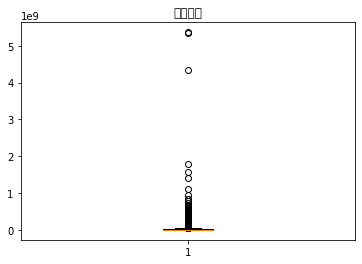

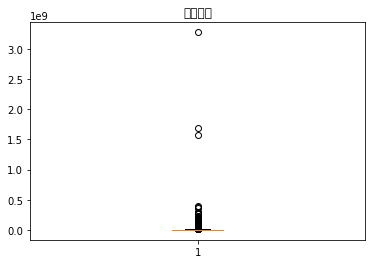

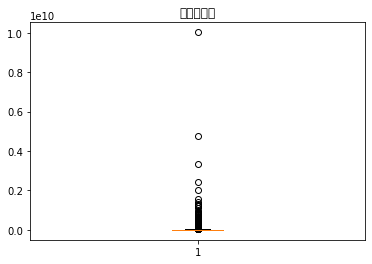

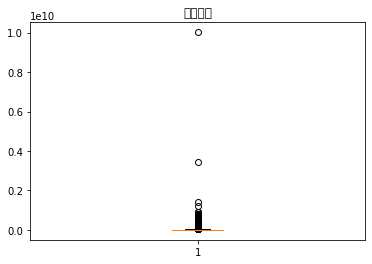

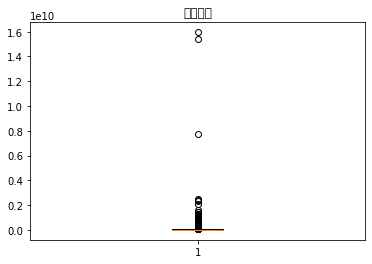

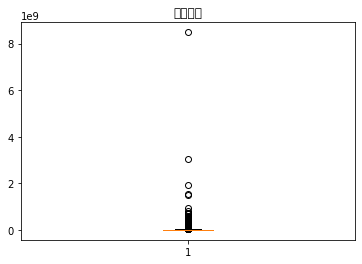

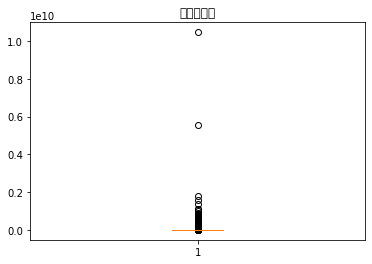

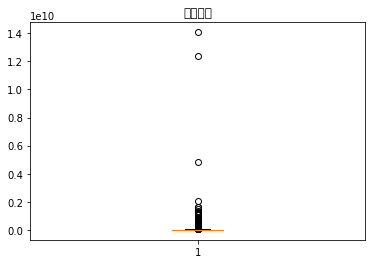

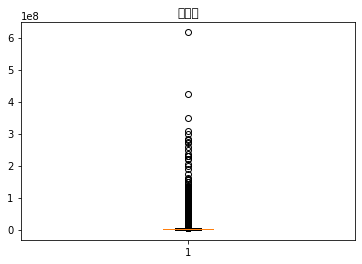

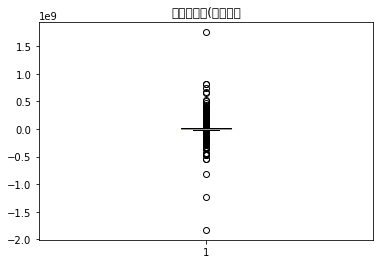

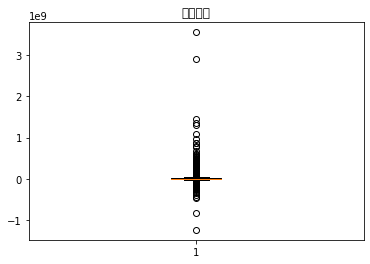

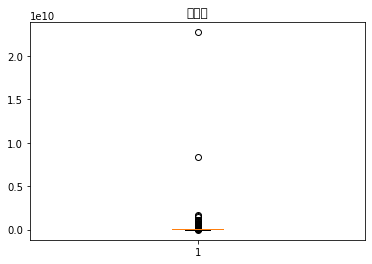

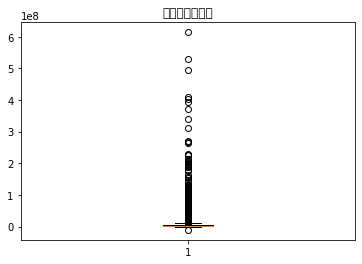

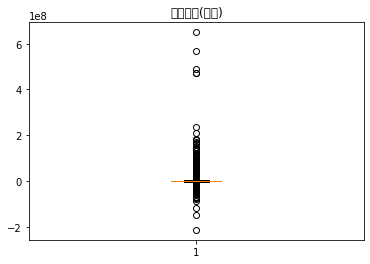

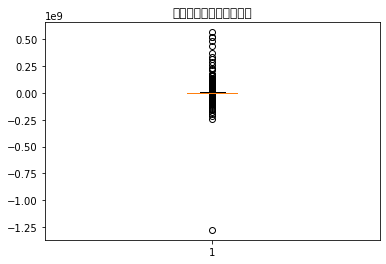

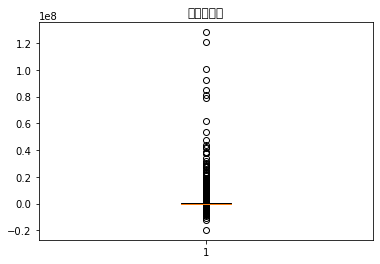

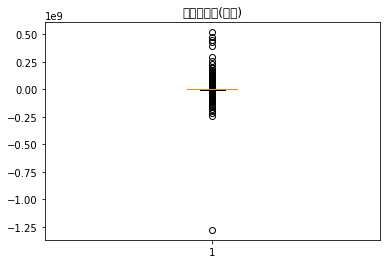

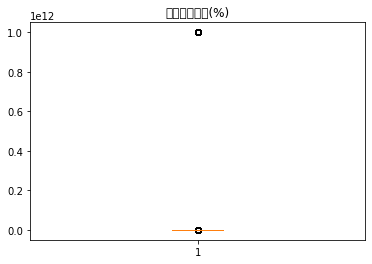

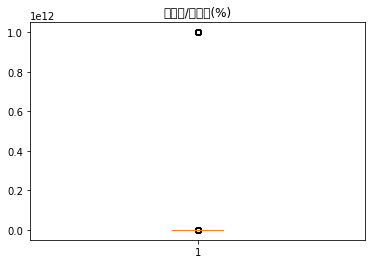

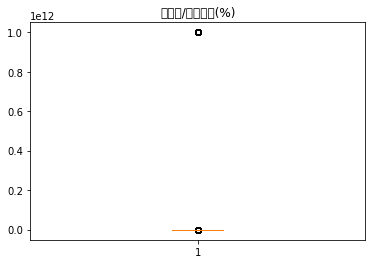

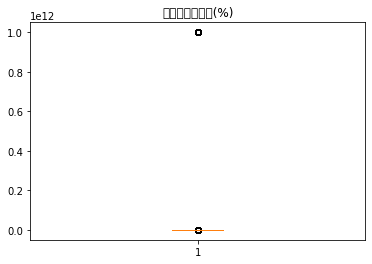

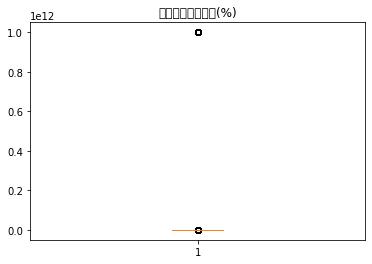

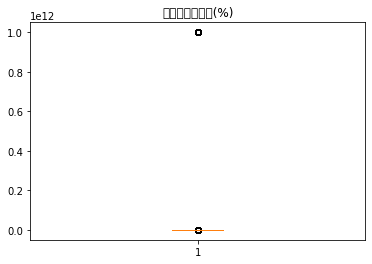

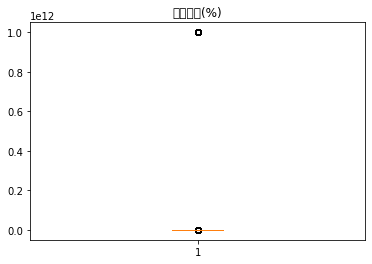

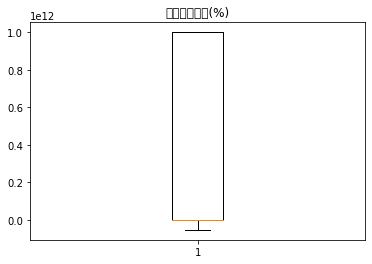

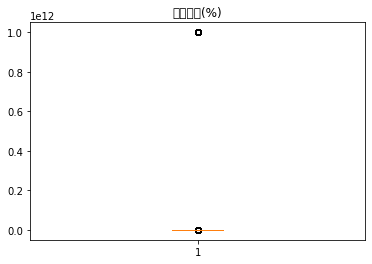

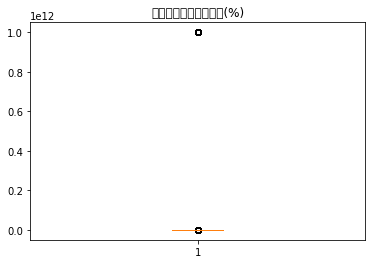

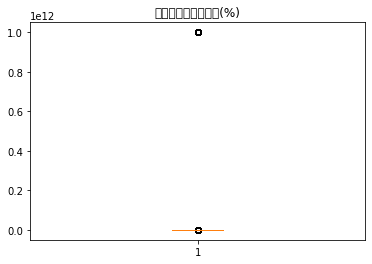

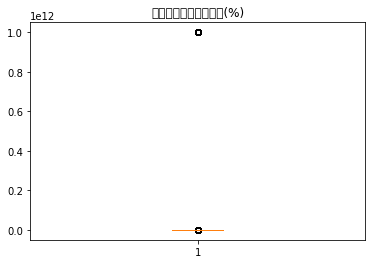

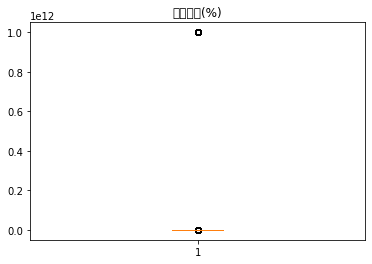

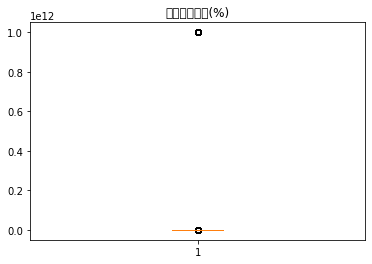

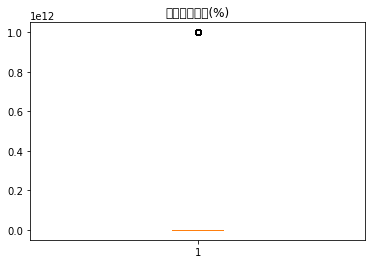

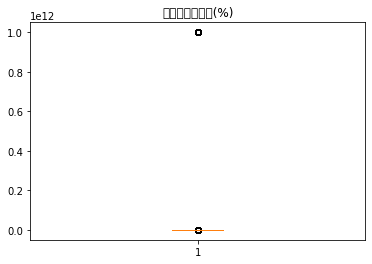

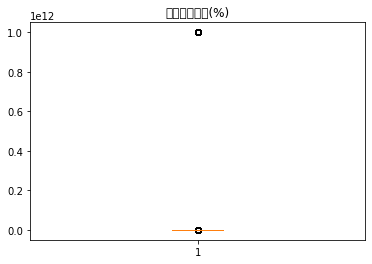

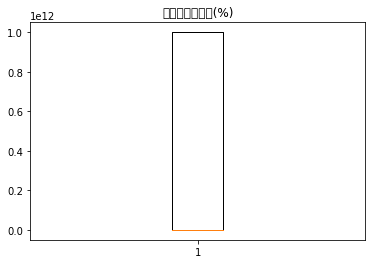

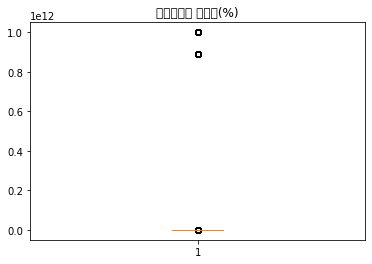

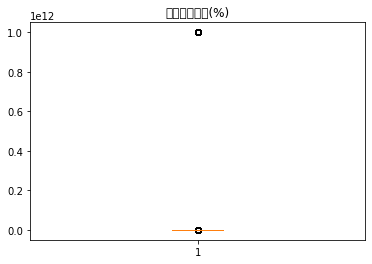

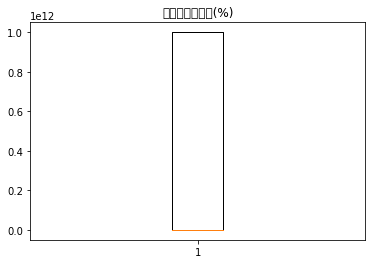

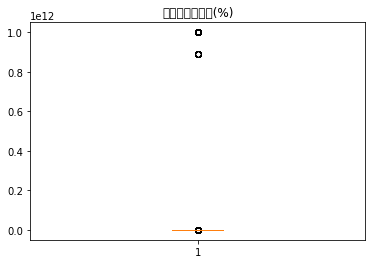

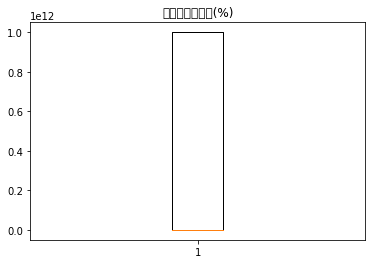

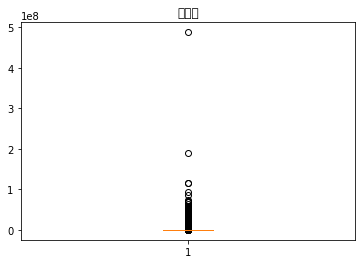

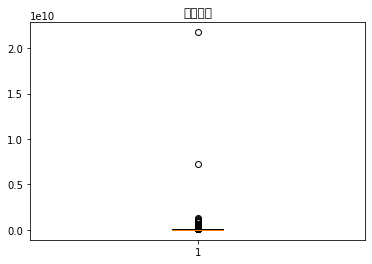

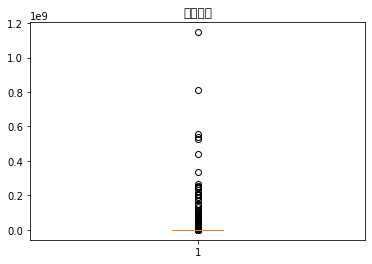

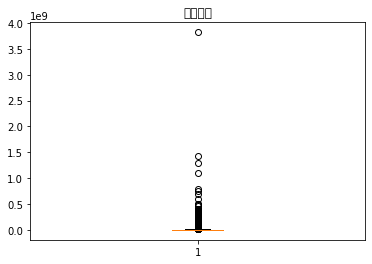

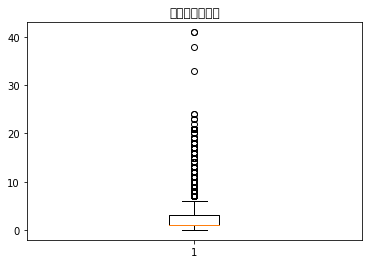

극단치가 있는 열: ['유동자산', '매출채권', '비유동자산', '유형자산', '자산총계', '유동부채', '비유동부채', '부채총계', '자본금', '이익잉여금(결손금）', '자본총계', '매출액', '판매비와관리비', '영업이익(손실)', '법인세비용차감전순손익', '법인세비용', '당기순이익(손실)', '기업순이익률(%)', '유보액/총자산(%)', '유보액/납입자본(%)', '매출액총이익률(%)', '매출액영업이익률(%)', '매출액순이익률(%)', '수지비율(%)', '영업비율(%)', '금융비용대매출액비율(%)', '금융비용대부채비율(%)', '금융비용대총비용비율(%)', '부채비율(%)', '차입금의존도(%)', '자기자본비율(%)', '순운전자본비율(%)', '유동부채비율(%)', '부채총계대 매출액(%)', '총자본회전율(%)', '매출채권회전율(%)', '미수금', '매출원가', '무형자산', '재고자산', '재무결측치개수']


In [80]:
# 극단치가 있는 열 확인
outlier_columns = []

# 열별로 박스 플롯 그리기
for column in drop_fin_df_newest.columns:
    plt.boxplot(drop_fin_df_newest[column])
    plt.title(column)
    plt.show()
    
    # 박스 플롯에서 극단치를 판별하여 리스트에 추가
    # 여기서는 예시로 박스 플롯의 극단치 기준으로 1.5 * IQR을 사용합니다.
    # IQR은 Interquartile Range(사분위 범위)로, Q3 - Q1 값을 의미합니다.
    Q1 = drop_fin_df_newest[column].quantile(0.25)
    Q3 = drop_fin_df_newest[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 3 * IQR
    upper_threshold = Q3 + 5 * IQR
    
    outliers = drop_fin_df_newest[(drop_fin_df_newest[column] < lower_threshold) | (drop_fin_df_newest[column] > upper_threshold)]
    if not outliers.empty:
        outlier_columns.append(column)

# 결과 출력
print("극단치가 있는 열:", outlier_columns)

In [81]:
len(outlier_columns)

41

In [83]:
list_outlier=outlier_columns

In [86]:
# 각 열의 극단치 대체
for column in list_outlier:
    # 해당 열의 하위 2% 값 계산
    lower_threshold = fin_df_newest[column].quantile(0.02)
    
    # 해당 열의 상위 98% 값 계산
    upper_threshold = fin_df_newest[column].quantile(0.98)
    
    # 극단치 대체
    fin_df_newest[column] = np.where(fin_df_newest[column] <= lower_threshold, lower_threshold, fin_df_newest[column])
    fin_df_newest[column] = np.where(fin_df_newest[column] >= upper_threshold, upper_threshold, fin_df_newest[column])

# 결과 출력
print(fin_df_newest)

            BIZ_NO      결산년월         유동자산       매출채권         비유동자산  \
70365   3998701201  20220630   4116258.00    49584.0  7.328153e+07   
4021    1068108497  20220630   2398951.00    14189.0  2.986225e+07   
105684  7668701226  20220630   1206284.00        0.0  3.326752e+07   
16364   1208797528  20220630   7674040.00        0.0  1.291723e+08   
85193   5198101477  20220630  16738082.00   162289.0  1.291723e+08   
...            ...       ...          ...        ...           ...   
96622   6138503232  20180331   8420115.00  4594414.0  2.843741e+06   
56480   2208864019  20180331    509555.00    63969.0  4.645899e+07   
13437   1198187988  20180331  33210936.00  3147154.0  6.790000e+05   
56147   2208819682  20180331  88312050.16        0.0  0.000000e+00   
4384    1068521106  20180331   4453272.00  2738121.0  1.105983e+06   

                유형자산          자산총계        유동부채       비유동부채         부채총계  ...  \
70365   7.272788e+07  7.739779e+07    256798.0  50259330.0   50516128.0  ...   

In [90]:
# 특정 열 삭제
drop_fin_df_newest_after = fin_df_newest.drop(['BIZ_NO', '결산년월'], axis=1)

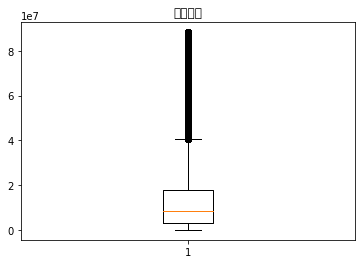

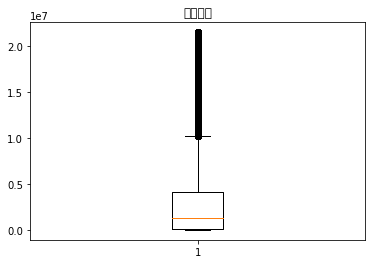

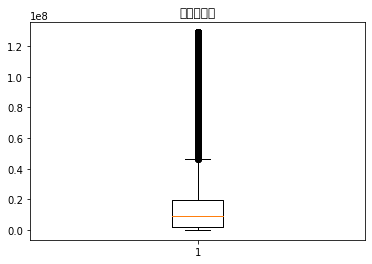

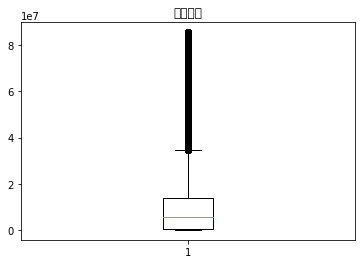

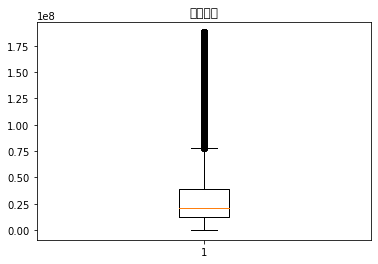

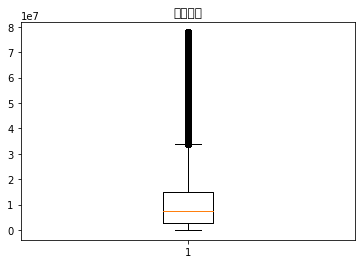

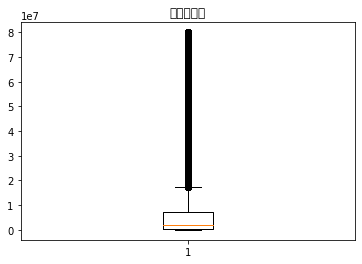

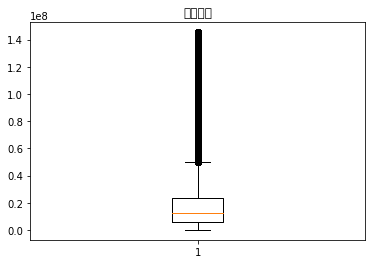

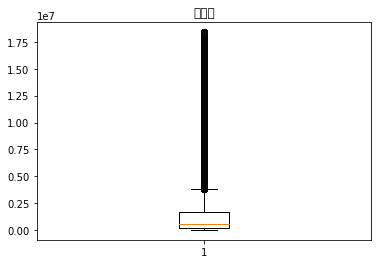

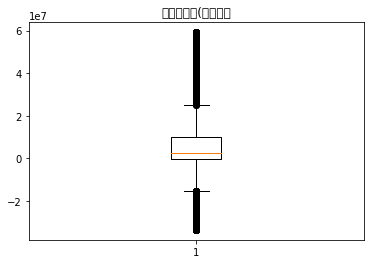

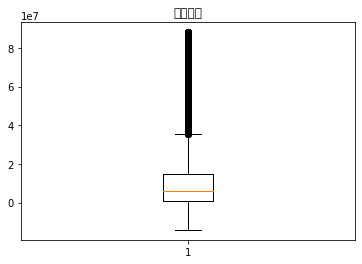

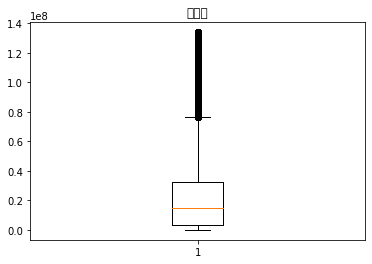

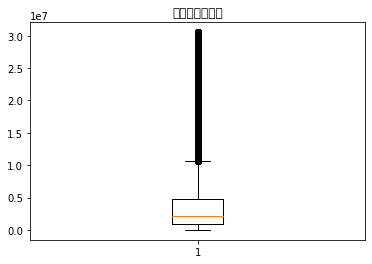

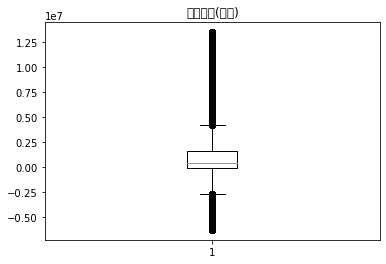

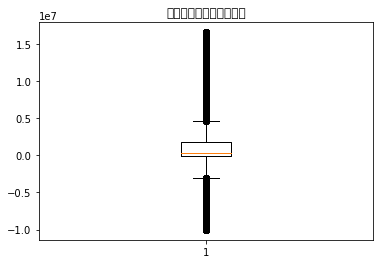

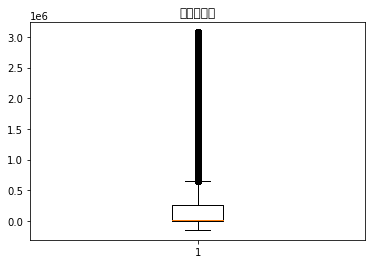

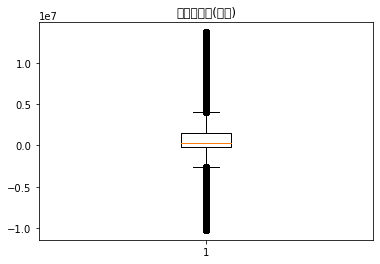

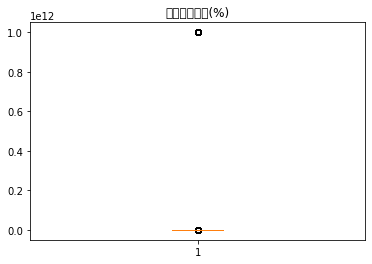

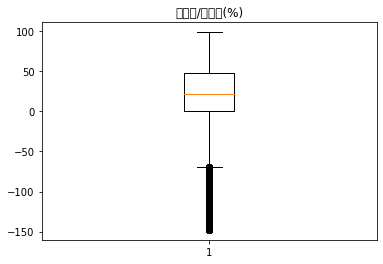

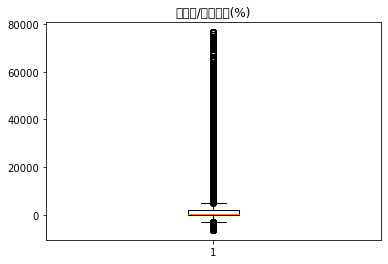

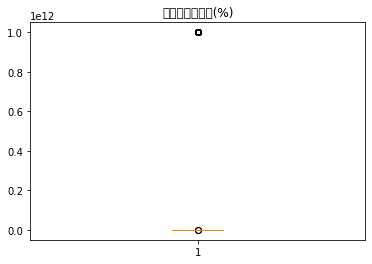

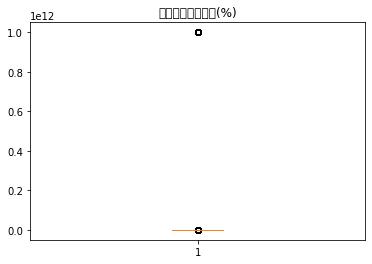

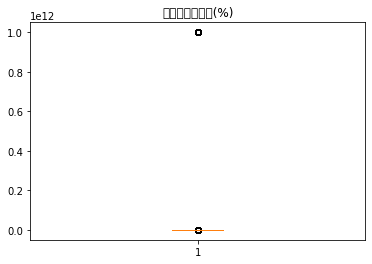

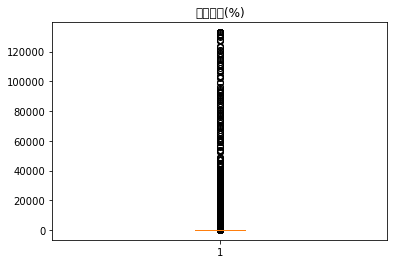

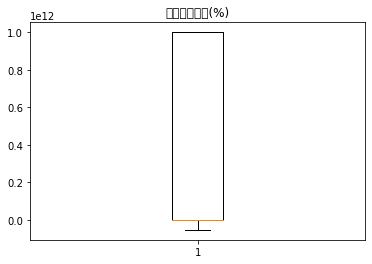

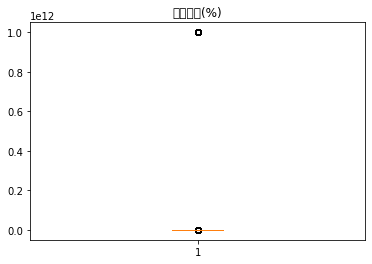

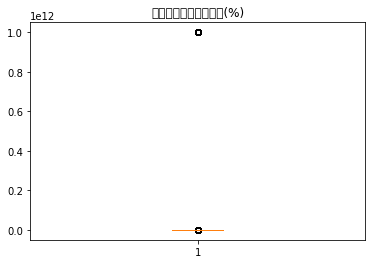

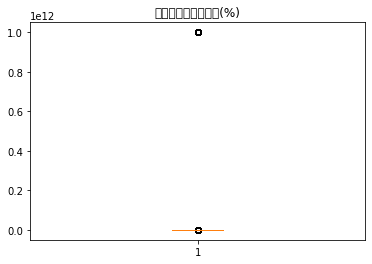

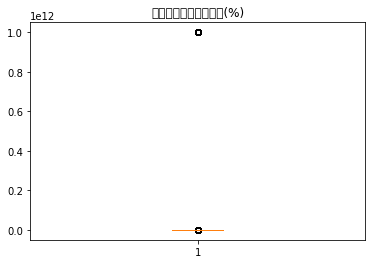

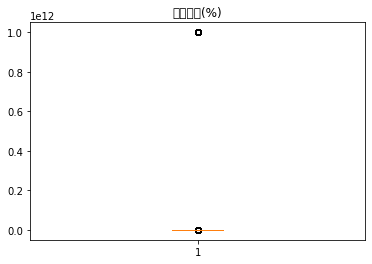

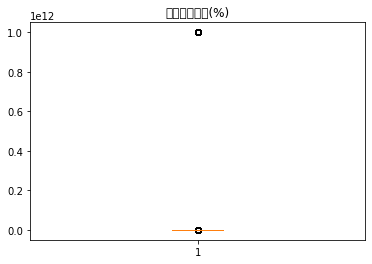

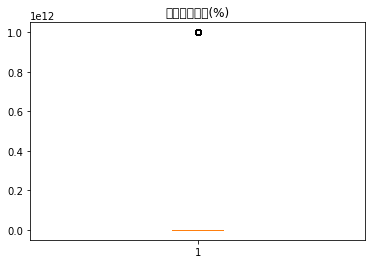

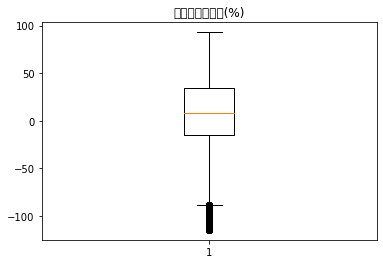

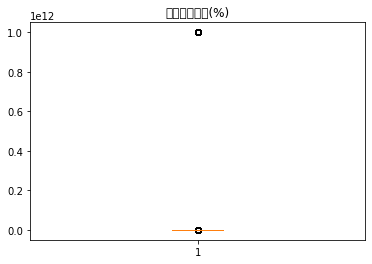

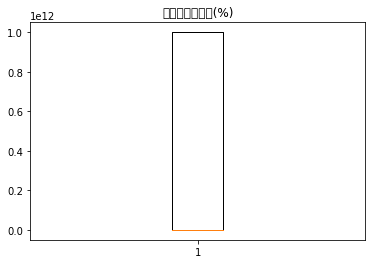

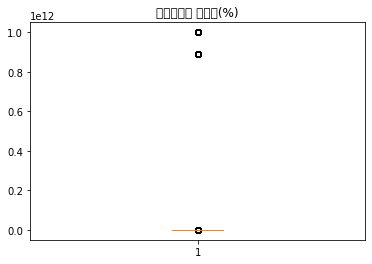

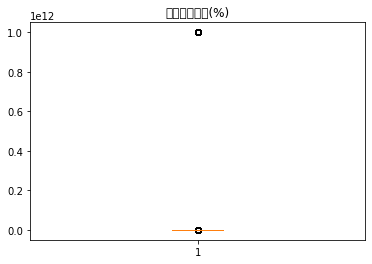

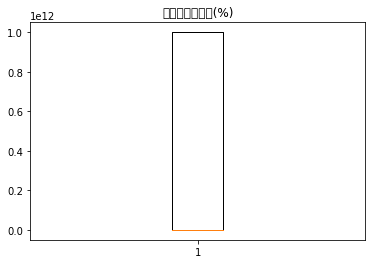

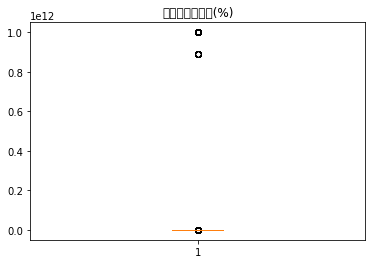

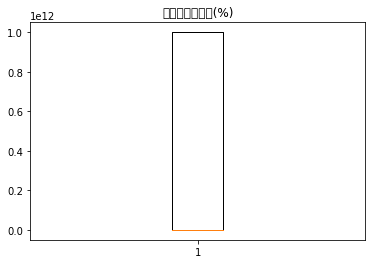

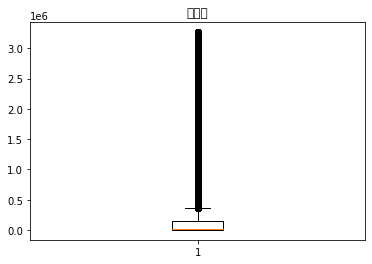

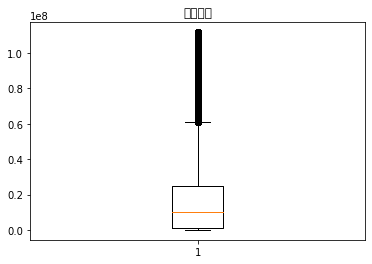

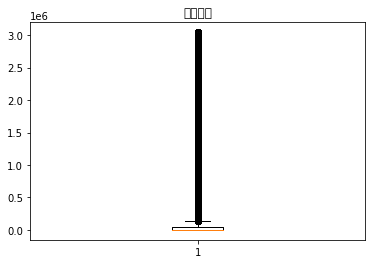

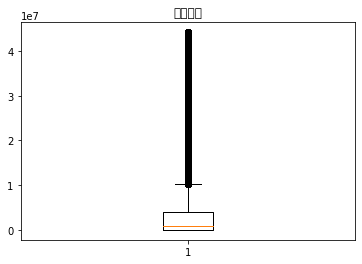

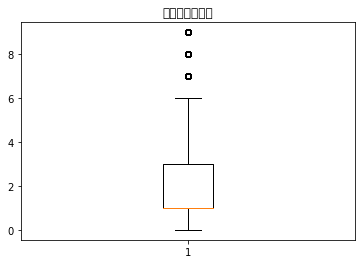

극단치가 있는 열: ['비유동자산', '유형자산', '자산총계', '유동부채', '비유동부채', '부채총계', '자본금', '이익잉여금(결손금）', '자본총계', '판매비와관리비', '영업이익(손실)', '법인세비용차감전순손익', '법인세비용', '당기순이익(손실)', '기업순이익률(%)', '유보액/총자산(%)', '유보액/납입자본(%)', '매출액총이익률(%)', '매출액영업이익률(%)', '매출액순이익률(%)', '수지비율(%)', '영업비율(%)', '금융비용대매출액비율(%)', '금융비용대부채비율(%)', '금융비용대총비용비율(%)', '부채비율(%)', '차입금의존도(%)', '자기자본비율(%)', '유동부채비율(%)', '부채총계대 매출액(%)', '총자본회전율(%)', '매출채권회전율(%)', '미수금', '무형자산', '재고자산']


In [91]:
#극단치 대체 후 확인
# 극단치가 있는 열 확인
outlier_columns = []

# 열별로 박스 플롯 그리기
for column in drop_fin_df_newest_after.columns:
    plt.boxplot(drop_fin_df_newest_after[column])
    plt.title(column)
    plt.show()
    
    # 박스 플롯에서 극단치를 판별하여 리스트에 추가
    # 여기서는 예시로 박스 플롯의 극단치 기준으로 1.5 * IQR을 사용합니다.
    # IQR은 Interquartile Range(사분위 범위)로, Q3 - Q1 값을 의미합니다.
    Q1 = drop_fin_df_newest_after[column].quantile(0.25)
    Q3 = drop_fin_df_newest_after[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 3 * IQR
    upper_threshold = Q3 + 5 * IQR
    
    outliers = drop_fin_df_newest_after[(drop_fin_df_newest_after[column] < lower_threshold) | (drop_fin_df_newest_after[column] > upper_threshold)]
    if not outliers.empty:
        outlier_columns.append(column)

# 결과 출력
print("극단치가 있는 열:", outlier_columns)

In [92]:
len(outlier_columns)

35

# 휴폐업이랑 합치기

In [61]:
close_df=pd.read_csv("C:\\Users\\seses\\Documents\\카카오톡 받은 파일\\휴폐업 재무 eda.csv")

In [68]:
close_df.columns

Index(['BIZ_NO', 'HDOF_BR_GB', 'FR_IVST_CORP_YN', 'VENT_YN', 'MDSCO_PRTC_YN',
       'ESTB_DATE', 'ESTB_GB', 'EMP_CNT', 'Industry', 'Stock_OX', 'Target'],
      dtype='object')

In [65]:
# 특정 열 기준으로 데이터프레임 합치기
merged_df = pd.merge(fin_df_newest, close_df, on='BIZ_NO')

In [66]:
merged_df

,BIZ_NO,결산년월,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,...,HDOF_BR_GB,FR_IVST_CORP_YN,VENT_YN,MDSCO_PRTC_YN,ESTB_DATE,ESTB_GB,EMP_CNT,Industry,Stock_OX,Target
0,6998800583,20220331,24965602.0,0.0,219000.0,0.0,25184602.0,1999913.0,0.0,1999913.0,...,1,N,N,N,20170328.0,1,2.0,K,(주),1
1,5168100635,20211231,615988.0,185615.0,42385.0,14120.0,658373.0,494966.0,103545.0,598511.0,...,1,N,Y,N,20170216.0,1,10.0,J,(주),1
2,1348715772,20211231,1596577.0,3802.0,353082.0,39340.0,1949659.0,771535.0,194663.0,966198.0,...,1,N,Y,N,20130925.0,1,14.0,J,(주),1
3,5158115284,20211231,30077990.0,6034264.0,15251977.0,7279856.0,45329967.0,15391552.0,5304808.0,20696360.0,...,1,N,Y,N,19990619.0,1,173.0,C,(주),1
4,1348631964,20211231,28431311.0,15498763.0,21334735.0,19795298.0,49766046.0,28142492.0,638761.0,28781253.0,...,1,N,Y,N,20060619.0,1,113.0,C,(주),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6726,6138503232,20180331,8420115.0,4594414.0,2843741.0,2595134.0,11263855.0,3346833.0,50000.0,3396833.0,...,2,N,N,N,NaN,5,NaN,G,NaN,1
6727,2208864019,20180331,509555.0,63969.0,46458990.0,45261425.0,46968545.0,27750710.0,1432216.0,29182926.0,...,1,N,N,N,20130809.0,1,10.0,L,(주),1
6728,1198187988,20180331,33210936.0,3147154.0,679000.0,0.0,33889936.0,2132432.0,0.0,2132432.0,...,1,N,N,N,20060322.0,1,3.0,G,(주),1
6729,2208819682,20180331,108220189.0,0.0,0.0,0.0,108220189.0,158577.0,0.0,158577.0,...,1,Y,N,N,20110617.0,1,4.0,L,(주),1


In [67]:
# 결측치가 있는 행의 개수 세기
missing_rows_count = merged_df.isna().any(axis=1).sum()

# 결과 출력
print(missing_rows_count)

1374
